In [ ]:
!pip install -q opendatasets

import pandas as pd
import opendatasets  as od

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# # data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# # metadata
print(adult.metadata)

# # variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/2/data.csv')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# data = data.dropna() #subset=['workclass','occupation','native-country']
data = data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47621 entries, 0 to 47620
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47621 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.4+ MB


In [ ]:
for col in data.columns :
   print(f"{col} : {data[col].unique()}")

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt : [ 77516  83311 215646 ... 173449  89686 350977]
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 

In [ ]:
data['income'] = data['income'].replace('<=50K.','<=50K')
data['income'] = data['income'].replace('>50K.','>50K')
for col in data.columns :
   print(f"{col} : {data[col].unique()}")

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt : [ 77516  83311 215646 ... 173449  89686 350977]
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 

In [ ]:
multi_category_features = ['workclass', 'education', 'marital-status',
                     'occupation', 'relationship', 'race', 'native-country',]
binary_category_features = ['sex','income',] #,
numerical_features = ['age', 'education-num', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week' ]
category_features = binary_category_features+multi_category_features

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder_(df, label_features):
  label_imapper = dict()
  le = LabelEncoder()
  for feature in label_features:
    df[feature] = le.fit_transform(df[feature])
    label_imapper[feature] = dict(zip(le.transform(le.classes_),le.classes_))
  return label_imapper

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encoder_(df, class_features):
  oe = OneHotEncoder()
  for feature in class_features:
    encoded = oe.fit_transform(df[[feature]])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=oe.get_feature_names_out([feature]))
    df = pd.concat([df, encoded_df], axis=1).drop(feature, axis=1)
  # print(df.head())
  return df

In [ ]:
from sklearn.preprocessing import StandardScaler

def normalizer_(df, numerical_features):
  normalizers = dict()

  for feature in numerical_features:
    scaler = StandardScaler()
    df[feature] = scaler.fit_transform(df[[feature]])
    normalizers[feature] = scaler
  return normalizers

In [ ]:
label_imapping = label_encoder_(data, binary_category_features)

In [ ]:
label_imapping

{'sex': {0: 'Female', 1: 'Male'}, 'income': {0: '<=50K', 1: '>50K'}}

In [ ]:
data = onehot_encoder_(data, multi_category_features)

In [ ]:
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,1,0,0,13,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,1,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,1,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='income'>

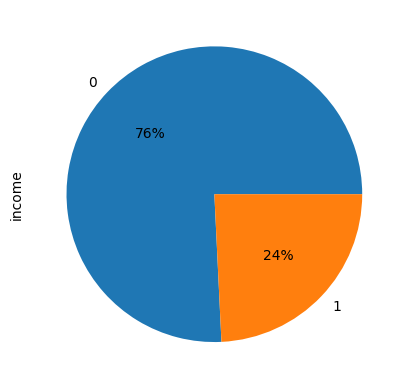

In [ ]:
data["income"].value_counts().plot(kind="pie",autopct='%1.0f%%')

**Upsampling Needed**

len(data_majority)=36080
len(data_minority)=11541


<Axes: ylabel='income'>

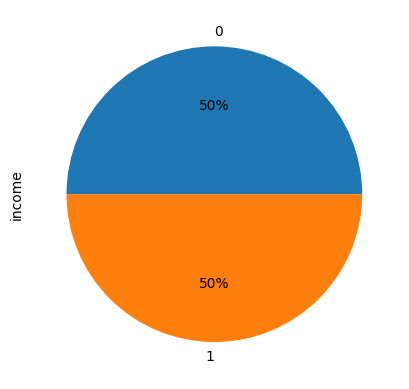

In [ ]:
from sklearn.utils import resample

data_majority = data[data['income'] == 0]
data_minority = data[data['income'] == 1]

print(f"{len(data_majority)=}")
print(f"{len(data_minority)=}")

data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=5)

data_balanced = pd.concat([data_majority, data_minority_upsampled])

data_balanced["income"].value_counts().plot(kind="pie",autopct='%1.0f%%')

In [ ]:
from sklearn.model_selection import train_test_split

y = data_balanced['income']
X = data_balanced.drop('income',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
len(X_test) == len(y_test)

True

**Normalize Numerical Features**

In [ ]:
normalizers = normalizer_(X_train, numerical_features)

In [ ]:
for feature in numerical_features:
  X_test[feature] = normalizers[feature].transform(X_test[[feature]])

In [ ]:
X_test.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
10835,-0.818894,0.931608,0.921592,0,-0.197595,-0.256445,-0.187609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26207,-0.041744,0.211236,0.921592,1,-0.197595,-0.256445,0.143137,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
865,-1.285184,1.160902,-0.229760,0,-0.197595,-0.256445,-2.254772,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17084,0.735406,-0.287689,-2.532463,1,0.121403,-0.256445,-0.187609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27002,-0.818894,-0.901927,-0.613544,1,-0.197595,-0.256445,-0.187609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Information Gain**

In [ ]:
import pandas as pd
import numpy as np

def calculate_entropy(labels):
    """Calculate entropy for a given set of labels."""
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(data, feature_name, target_name):
    """Calculate information gain for a specific feature."""
    total_entropy = calculate_entropy(data[target_name])

    # Calculate weighted average of entropy for each unique value of the feature
    unique_values = data[feature_name].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature_name] == value]
        subset_weight = len(subset) / len(data)
        subset_entropy = calculate_entropy(subset[target_name])
        weighted_entropy += subset_weight * subset_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain


In [ ]:
information_gain_feature = dict()
for feature in X_train.columns:
  information_gain_feature[feature] = calculate_information_gain(pd.concat([X_train, y_train], axis=1), feature, 'income')
#print(f"Info gain on {feature}: {information_gain_feature[feature]}")

In [ ]:
sorted_dict_asc = dict(sorted(information_gain_feature.items(), key=lambda item: item[1], reverse=True))
sorted_dict_asc

{'fnlwgt': 0.7177309776239555,
 'marital-status_Married-civ-spouse': 0.21250723453800913,
 'relationship_Husband': 0.16009186154166088,
 'age': 0.14598160117942616,
 'marital-status_Never-married': 0.1331909940353656,
 'capital-gain': 0.1307057368942378,
 'education-num': 0.11854246195797158,
 'hours-per-week': 0.0829149269448285,
 'relationship_Own-child': 0.08129653240972656,
 'capital-loss': 0.05948450072942313,
 'sex': 0.052666344899517714,
 'relationship_Not-in-family': 0.0435849255027968,
 'occupation_Other-service': 0.03760504714458668,
 'occupation_Exec-managerial': 0.034665722227684936,
 'relationship_Unmarried': 0.029520770948422426,
 'occupation_Prof-specialty': 0.029020101130692755,
 'education_Bachelors': 0.025571626390594848,
 'education_Masters': 0.021712511740913043,
 'marital-status_Divorced': 0.01949377422307208,
 'education_HS-grad': 0.01740616319172239,
 'education_Prof-school': 0.01641289534604906,
 'workclass_Self-emp-inc': 0.014335274519136632,
 'relationship_Oth

In [ ]:
list(sorted_dict_asc.keys())

['fnlwgt',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age',
 'marital-status_Never-married',
 'capital-gain',
 'education-num',
 'hours-per-week',
 'relationship_Own-child',
 'capital-loss',
 'sex',
 'relationship_Not-in-family',
 'occupation_Other-service',
 'occupation_Exec-managerial',
 'relationship_Unmarried',
 'occupation_Prof-specialty',
 'education_Bachelors',
 'education_Masters',
 'marital-status_Divorced',
 'education_HS-grad',
 'education_Prof-school',
 'workclass_Self-emp-inc',
 'relationship_Other-relative',
 'education_11th',
 'relationship_Wife',
 'occupation_Handlers-cleaners',
 'education_Doctorate',
 'race_Black',
 'occupation_Adm-clerical',
 'workclass_Private',
 'race_White',
 'marital-status_Separated',
 'education_10th',
 'occupation_Machine-op-inspct',
 'native-country_Mexico',
 'marital-status_Widowed',
 'occupation_?',
 'workclass_?',
 'education_7th-8th',
 'education_9th',
 'workclass_Federal-gov',
 'occupation_Farming-fishing',
 'educat

In [ ]:
k = 70
top_k_features = list(sorted_dict_asc.keys())[:k]
top_k_features

['fnlwgt',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age',
 'marital-status_Never-married',
 'capital-gain',
 'education-num',
 'hours-per-week',
 'relationship_Own-child',
 'capital-loss',
 'sex',
 'relationship_Not-in-family',
 'occupation_Other-service',
 'occupation_Exec-managerial',
 'relationship_Unmarried',
 'occupation_Prof-specialty',
 'education_Bachelors',
 'education_Masters',
 'marital-status_Divorced',
 'education_HS-grad',
 'education_Prof-school',
 'workclass_Self-emp-inc',
 'relationship_Other-relative',
 'education_11th',
 'relationship_Wife',
 'occupation_Handlers-cleaners',
 'education_Doctorate',
 'race_Black',
 'occupation_Adm-clerical',
 'workclass_Private',
 'race_White',
 'marital-status_Separated',
 'education_10th',
 'occupation_Machine-op-inspct',
 'native-country_Mexico',
 'marital-status_Widowed',
 'occupation_?',
 'workclass_?',
 'education_7th-8th',
 'education_9th',
 'workclass_Federal-gov',
 'occupation_Farming-fishing',
 'educat

In [ ]:
X_train_top_k = X_train[top_k_features]
X_test_top_k = X_test[top_k_features]

***Logistic Regression***

In [ ]:
class LogisticRegression:
    def __init__(self, error_thres=0.5, learning_rate=0.01, n_iters=1000):
        self.error_thres = error_thres
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            err = np.mean((y_predicted-y) ** 2) # MSE
            if err < self.error_thres :
              break

            dw = np.dot(X.T, (y_predicted - y))
            # dw = dw / np.linalg.norm(dw)
            # db = (1 / n_samples) * np.sum(y_predicted - y)
            db = np.sum(y_predicted-y)
            # db = db / np.linalg.norm(db)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db



        # print(f"{X.T=}")
        # print(f"{np.dot(X.T,(y_predicted-y))}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

regressor = LogisticRegression(error_thres=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


# True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
true_positive_rate = TP / (TP + FN)
true_negative_rate = TN / (TN + FP)
positive_predictive_value = TP / (TP + FP)
false_discovery_rate = FP / (TP + FP)
f1 = f1_score(y_test, y_pred)


print("LR classification accuracy:", accuracy)
print(f'True Positive Rate: {true_positive_rate:.2f}')
print(f'True Negative Rate: {true_negative_rate:.2f}')
print(f'Positive Predictive Value: {positive_predictive_value:.2f}')
print(f'False Discovery Rate: {false_discovery_rate:.2f}')
print(f'F1 Score: {f1:.2f}')

<ipython-input-107-dfa930f64679>:44: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


LR classification accuracy: 0.7451496674057649
True Positive Rate: 0.54
True Negative Rate: 0.95
Positive Predictive Value: 0.91
False Discovery Rate: 0.09
F1 Score: 0.68


***AdaBoost***

In [ ]:
import copy
class AdaBoostClassifier:
    def __init__(self, base_estimator, k=50):
        self.k = k
        self.base_estimator = base_estimator
        self.w = []
        self.z = []
        self.models = []
        self.epsilon = 1e-10


    def resample(self,X,y):
      n = len(X)
      # for _ in range(n):
      print(self.w)
      indices = np.random.choice(len(X), size=len(X), replace=True, p=self.w)

      return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.ones(n_samples) / n_samples  # Initialize weights uniformly

        for _ in range(self.k):
            indices = np.random.choice(len(X),size=len(X), replace=True, p=self.w)
            X_ = X.iloc[indices]
            y_ = y.iloc[indices]

            model = copy.deepcopy(self.base_estimator)
            model.fit(X_, y_)

            y_pred = model.predict(X)

            error = np.sum(self.w * (y_pred != y))

            # print(error)
            # if error > 0.5 :
            #   continue
            # print("here")

            error = max(error,self.epsilon)

            matching_predictions = (y_pred == y)  # Find where predictions match y
            self.w[matching_predictions] *= error / (1 - error)
            self.w /= np.sum(self.w)


            z_ = 0.5 * np.log((1.0 - error) / error)

            # w = w * np.exp(-z_ * y_ * y_pred)
            # w /= np.sum(w)
            self.z.append(z_)
            self.models.append(model)
        print(f"{self.models}")

    def predict(self, X):
        final_predictions = np.zeros(len(X))
        print(len(self.models))
        for z_, model in zip(self.z, self.models):
            predictions = z_ * np.array(model.predict(X))
            final_predictions += predictions
        print(f"{final_predictions=}")
        print(f"{final_predictions.shape}")
        y_predicted_cls = [1 if i > 0.5 else 0 for i in final_predictions]
        return np.array(y_predicted_cls)



In [1]:
from sklearn.metrics import accuracy_score
regressor = LogisticRegression(error_thres=0.0)
adaboost_classifier = AdaBoostClassifier(base_estimator=regressor,k=25)

adaboost_classifier.fit(X_train_top_k, y_train)

y_pred = adaboost_classifier.predict(X_test_top_k)

print(y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")

NameError: ignored